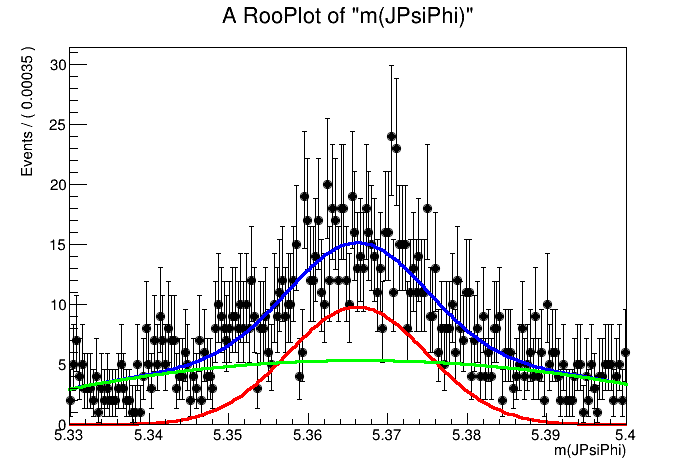


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (sigPDF,bkgPDF)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c1          -1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     2 c2          -1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     3 mean         5.37000e+00  8.00000e-03    5.33000e+00  5.41000e+00
     4 nBkg         5.00000e+03  1.99990e+03    1.00000e+00  2.00000e+04
     5 nSig         1.50000e+04  1.99990e+03    1.00000e+00  2.00000e+04
     6 s

IOStream.flush timed out


In [1]:
ROOT::RDataFrame d("rootuple/CandidateTree", "/lustre/cms/store/user/adiflori/jpsikk_DataRunII_UltraLegacy_miniAODv2_v1_m4To6/Charmonium/crab_Charmonium_Run2018D-UL2018_MiniAODv2-v1_MINIAOD__1SKK_20220512_114449/220512_094551/0000/rootuple.root");

auto cut = d.Filter("candidate_charge == 0")
          .Filter("candidate_cosAlpha * candidate_cosAlpha > 0.99 * 0.99")
          .Filter("candidate_vProb > 0.05")
          .Filter("candidate_lxy / candidate_lxyErr > 3.0")
          .Filter("ditrack_mass > 1.014")
          .Filter("ditrack_mass < 1.024");

auto hist1 = cut.Histo1D({"candidate_vMass", "candidate mass", 200, 5.33, 5.4}, "candidate_vMass");

TCanvas canvas;

Double_t xMin = hist1->GetXaxis()->GetXmin();
Double_t xMax = hist1->GetXaxis()->GetXmax();
Int_t nBins = hist1->GetNbinsX();
RooRealVar xVar("xVar", "m(JPsiPhi)", xMin, xMax);
xVar.setBins(nBins);
RooDataHist jpsiphiHist("JPsiPhi_Hist", hist1->GetTitle(), RooArgSet(xVar), RooFit::Import(*hist1, kFALSE));

RooRealVar mG("mean", "mean", 5.37, 5.33, 5.41);
RooRealVar sigma1("sigma1", "sigma1", 0.005, 0.0001, 0.01);
RooGaussian sigPDF("sigPDF", "Signal", xVar, mG, sigma1);

RooRealVar c1("c1", "c1", -0.1, -10, 10);
RooRealVar c2("c2", "c2", -0.1, -10, 10);
RooChebychev bkgPDF("bkgPDF", "Background", xVar, RooArgSet(c1, c2));

RooRealVar nSig("nSig", "nSig", 1.5e+4, 1, 2e+4);
RooRealVar nBkg("nBkg", "nBkg", 0.5e+4, 1, 2e+4);

RooAddPdf totalPDF("totalPDF", "totalPDF", RooArgList(sigPDF, bkgPDF), RooArgList(nSig, nBkg));

totalPDF.fitTo(jpsiphiHist, RooFit::Extended(kTRUE));

RooPlot* xframe = xVar.frame();

jpsiphiHist.plotOn(xframe);
totalPDF.plotOn(xframe);
totalPDF.plotOn(xframe, RooFit::Components(RooArgSet(sigPDF)), RooFit::LineColor(kRed));
totalPDF.plotOn(xframe, RooFit::Components(RooArgSet(bkgPDF)), RooFit::LineColor(kGreen));


xframe->Draw();
canvas.Draw();